# Assignment 1 - Flower Drawing Optimization

Who doesn't love flowers? In this assignment we will plot many beautiful flowers using my very special custom algorithm. It is blazingly fast, and chock-a-block full of state of the art optimizations!

In [1]:
# Ignore me
%load_ext autoreload

In [2]:
# Ignore me - im just an import block
%autoreload 2

from SlowFlowers import BadFlowerDrawer
import matplotlib.pyplot as plt
import random as rnd
import time
import cProfile
import subprocess
from IPython.display import Image

## Lets use my super special algorithm to plot a flower
As you can see, we can specify the number of petals, the center of the flower, and the size you would like it to be.

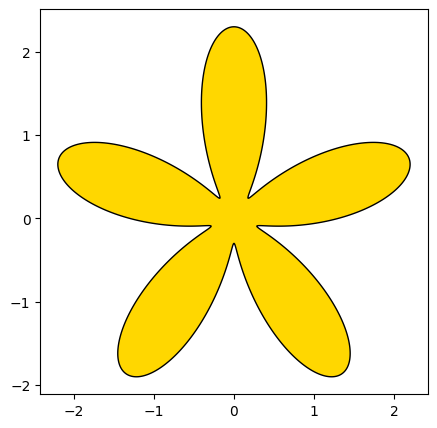

In [3]:
bad_flower_instance = BadFlowerDrawer()
x, y = zip(*bad_flower_instance.draw_one_flower(1))

plt.figure(figsize=(5,5))
plt.fill(x,y, edgecolor='black', facecolor='gold')
plt.show()

## Lets plot even more fun flowers
I have also added a feature to plot as many flowers as you wish! All you have to do is supply a list of tuples containing the center point and size of the flower you would like to draw, and my algorithm will take care of the rest.

In [4]:
inputs = [(19, 21, 2), (15, 11, 3), (19, 4, 2), (7, 20, 2), (5, 6, 1)]
print(inputs)

[(19, 21, 2), (15, 11, 3), (19, 4, 2), (7, 20, 2), (5, 6, 1)]


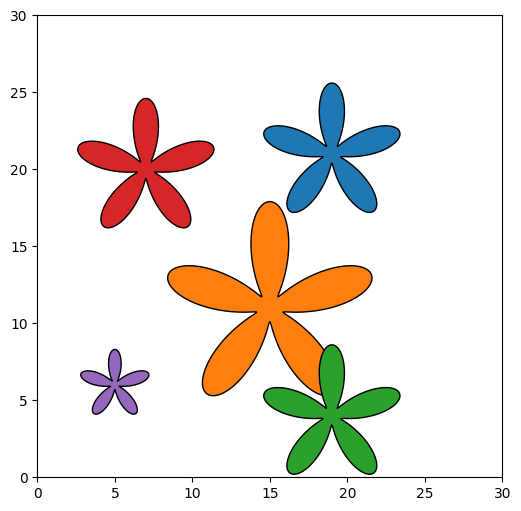

Total Time to compute 5 flowers: 31.06 seconds


In [5]:

start = time.perf_counter()
flowers = bad_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()
good_flowers = flowers

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)
for t in flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

print(f"Total Time to compute 5 flowers: {stop-start:.2f} seconds")

## And it only took 31 seconds to draw all of those flowers...
Huh, thats not as fast as I had hoped... Maybe we can do some profiling to figure out where I am losing all of this time...

In [6]:
cProfile.run('bad_flower_instance.draw_many_flower(inputs)')

         157696923 function calls in 80.548 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.001    0.001   80.548   80.548 <string>:1(<module>)
    12550   21.219    0.002   80.521    0.006 SlowFlowers.py:11(place_in_list)
 15768435   20.855    0.000   53.556    0.000 SlowFlowers.py:39(compute_point)
 31536870   21.565    0.000   30.321    0.000 SlowFlowers.py:47(polar_to_cartesian)
        5    0.025    0.005   80.547   16.109 SlowFlowers.py:53(draw_one_flower)
        1    0.000    0.000   80.547   80.547 SlowFlowers.py:88(draw_many_flower)
        4    0.000    0.000    0.000    0.000 cycler.py:239(__iter__)
        1    0.000    0.000   80.548   80.548 {built-in method builtins.exec}
    12555    0.006    0.000    0.006    0.000 {built-in method builtins.len}
 31511770    5.724    0.000    5.724    0.000 {built-in method math.atan2}
 47305305    6.621    0.000    6.621    0.000 {built-in method math.cos}


## While this is useful info, Its quite dense to read - lets make it a graphical view

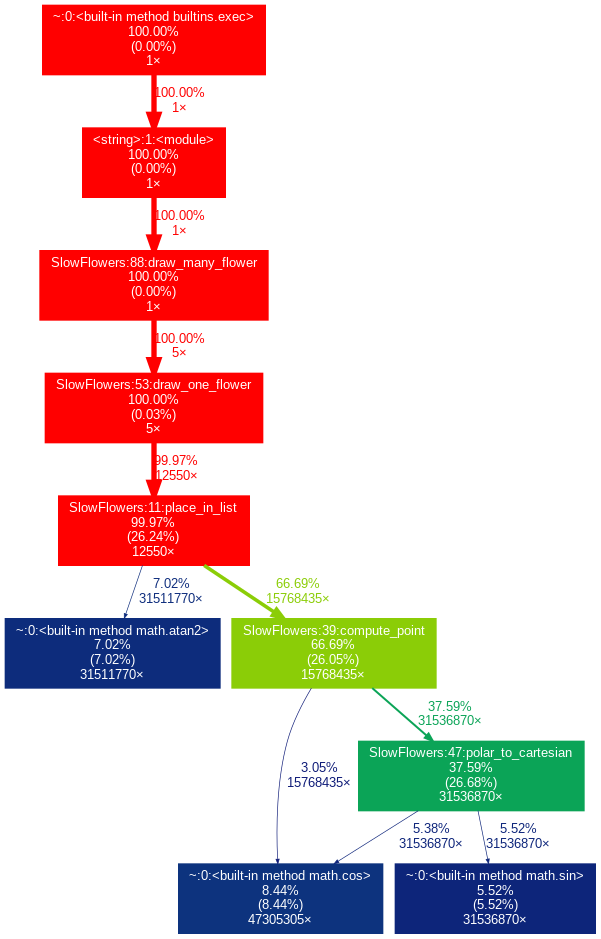

In [7]:
cProfile.run('bad_flower_instance.draw_many_flower(inputs)', 'flowers.pstats')
subprocess.call(['python3', 'gprof2dot.py', '-f', 'pstats', './flowers.pstats', '-o', 'flowers.dot' ])
subprocess.call(['dot', '-Tpng', '-o', 'flowers.png', 'flowers.dot' ])
Image('flowers.png')

# Why is my code so bad???
## This is your asignment sandbox location

In the next cells is setup a place to test your updated flower code.

- Help me fix my slow flower class, and make it faster. 
- You can run it here, and see if the circles are the same.

**If the circles are not the same here, they will not be the same on the autograder, So be sure to test them here first!**

In [15]:
def flowers_are_same(good_flowers, suspicious_flowers):
    """Compares two sets of flowers and determines weather they are same"""
    for good_flower, sus_flower in zip(good_flowers, suspicious_flowers):
        if good_flower != sus_flower:
            return False
        return True

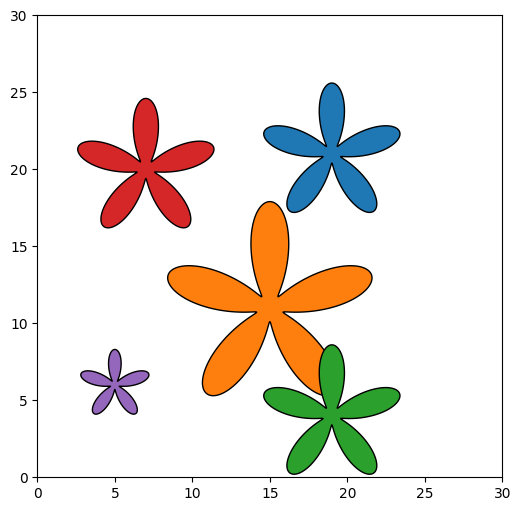

Total Time to compute 5 flowers: 33.72 seconds
The flowers ARE the same!


In [134]:
from FastFlowers import FastFlowerDrawer

fast_flower_instance = FastFlowerDrawer()


start = time.perf_counter()
fast_flowers = fast_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)

for t in fast_flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

tot_time = stop-start
print(f"Total Time to compute 5 flowers: {tot_time:.2f} seconds")

same = flowers_are_same(good_flowers, fast_flowers)
print(f"The flowers {'ARE' if same else 'ARE NOT'} the same!")

# When the flowers are not the same it will look like this

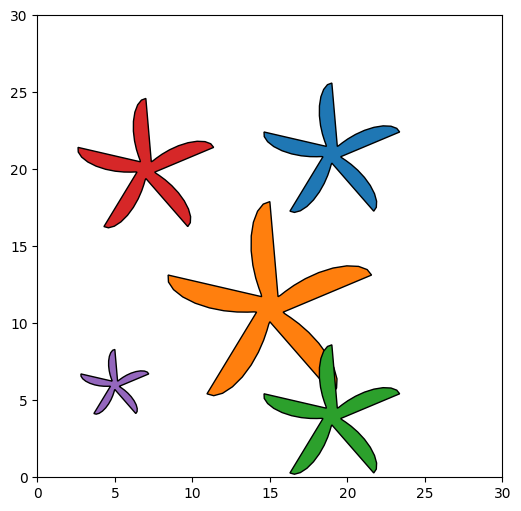

Total Time to compute 5 flowers: 0.02 seconds
The flowers ARE NOT the same!


In [16]:
from NotReallyFlowers import NotReallyAFlowerDrawer

not_flower_instance = NotReallyAFlowerDrawer()


start = time.perf_counter()
not_flowers = not_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()

plt.figure(figsize=(6,6))
plt.xlim(0, 30)
plt.ylim(0, 30)

for t in not_flowers:
    x, y = zip(*t)
    plt.fill(x, y, edgecolor='black')

plt.show()

tot_time = stop-start
print(f"Total Time to compute 5 flowers: {tot_time:.2f} seconds")

same = flowers_are_same(good_flowers, not_flowers)
print(f"The flowers {'ARE' if same else 'ARE NOT'} the same!")

# Your Assignment

1. Make `FastFlowers.py` *actually* fast
2. Test your faster code with the above testing structure
3. **Ensure** that your flowers match the original flowers for points!